## Customer Segmentation

### Problem Statement


An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market. 

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for different segment of customers. This strategy has work exceptionally well for them. They plan to use the same strategy on new markets and have identified 2627 new potential customers. 

You are required to help the manager to predict the right group of the new customers.

**Data Description**

**Variable	Definition**

ID	-             Unique ID

Gender	-         Gender of the customer

Ever_Married -	  Marital status of the customer

Age	-             Age of the customer

Graduated -  	  Is the customer a graduate?

Profession -	  Profession of the customer

Work_Experience - Work Experience in years

Spending_Score -  Spending score of the customer

Family_Size	-     Number of family members for the customer (including the customer)

Var_1 -           Anonymised Category for the customer

Segmentation -    (target) Customer Segment of the customer

**sample_submission.csv**

**ID**: Unique ID

**Segmentation**: Predicted segment for customers in the test set

**Evaluation Metric**

The evaluation metric for this hackathon is Accuracy Score.

**Public and Private split**

The public leaderboard is based on 40% of test data, while final rank would be decided on remaining 60% of test data (which is private leaderboard)

**Guidelines for Final Submission**

Please ensure that your final submission includes the following:

1. Solution file containing the predicted segment of the customer (A, B, C & D)
2. Code file for reproducing the submission, note that it is mandatory to submit your code for a valid final submission


### Importing libraries

In [105]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt

import statistics
from statistics import median, median_grouped, median_high,median_low

from scipy.stats import skew, norm

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)  
pd.set_option('display.expand_frame_repr',False)
pd.set_option('max_colwidth',-1)
#pd.set_option('display.max_rows',None)

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.classifier import StackingClassifier


### Reading datasets

In [106]:
Train = pd.read_csv('Train.csv')
Test = pd.read_csv('Test.csv')
submission = pd.read_csv('sample_submission.csv')

In [107]:
Train

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [108]:
Test

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [109]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [110]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [111]:
Train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,8068.0,463479.214551,2595.381232,458982.0,461240.75,463472.5,465744.25,467974.0
Age,8068.0,43.466906,16.711696,18.0,30.00,40.0,53.00,89.0
Work_Experience,7239.0,2.641663,3.406763,0.0,0.00,1.0,4.00,14.0
Family_Size,7733.0,2.850123,1.531413,1.0,2.00,3.0,4.00,9.0


In [112]:
Test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2627.0,463433.918919,2618.245698,458989.0,461162.5,463379.0,465696.0,467968.0
Age,2627.0,43.649791,16.967015,18.0,30.0,41.0,53.0,89.0
Work_Experience,2358.0,2.552587,3.341094,0.0,0.0,1.0,4.0,14.0
Family_Size,2514.0,2.825378,1.551906,1.0,2.0,2.0,4.0,9.0


In [113]:
Train.isnull().sum()

ID                 0  
Gender             0  
Ever_Married       140
Age                0  
Graduated          78 
Profession         124
Work_Experience    829
Spending_Score     0  
Family_Size        335
Var_1              76 
Segmentation       0  
dtype: int64

In [114]:
Test.isnull().sum()

ID                 0  
Gender             0  
Ever_Married       50 
Age                0  
Graduated          24 
Profession         38 
Work_Experience    269
Spending_Score     0  
Family_Size        113
Var_1              32 
dtype: int64

In [115]:
missing = Train.isnull().sum() *100 / len(Train)
missing = missing [missing > 0]
missing.sort_values(inplace = True)
missing

Var_1              0.941993 
Graduated          0.966782 
Profession         1.536936 
Ever_Married       1.735250 
Family_Size        4.152206 
Work_Experience    10.275161
dtype: float64

### Imputation

In [116]:
cat_none = ['Var_1', 'Graduated', 'Profession', 'Ever_Married', 'Family_Size', 'Work_Experience']

In [117]:
from sklearn.impute import SimpleImputer

In [118]:
cat_imputer = SimpleImputer(strategy='most_frequent')

In [119]:
cat_imputer.fit(Train[cat_none])

Train[cat_none] = cat_imputer.transform(Train[cat_none])  

Test[cat_none] = cat_imputer.transform(Test[cat_none])  


In [120]:
Train.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [121]:
Test.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

In [122]:
Train['Work_Experience'] = Train['Work_Experience'].astype('int64') 

In [123]:
Test['Work_Experience'] = Test['Work_Experience'].astype('int64')

In [124]:
Train['Family_Size'] = Train['Family_Size'].astype('int64')

In [125]:
Test['Family_Size'] = Test['Family_Size'].astype('int64')

In [126]:
Train['Work_Experience'] = Train['Work_Experience'].astype('category') 

In [127]:
Test['Work_Experience'] = Test['Work_Experience'].astype('category')

In [128]:
Train['Family_Size'] = Train['Family_Size'].astype('category')

In [129]:
Test['Family_Size'] = Test['Family_Size'].astype('category') 

In [130]:
print(Train.shape)
for i in Train.columns.values:
    print (i)
    print (Train[i].nunique())
    print (Train[i].unique())
    print("================")

(8068, 11)
ID
8068
[462809 462643 466315 ... 465406 467299 461879]
Gender
2
['Male' 'Female']
Ever_Married
2
['No' 'Yes']
Age
67
[22 38 67 40 56 32 33 61 55 26 19 70 58 41 31 79 49 18 36 35 45 42 83 27
 28 47 29 57 76 25 72 48 74 59 39 51 30 63 52 60 68 86 50 43 80 37 46 69
 78 71 82 23 20 85 21 53 62 75 65 89 66 73 77 87 84 81 88]
Graduated
2
['No' 'Yes']
Profession
9
['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing']
Work_Experience
15
[1, 0, 4, 9, 12, ..., 7, 2, 6, 10, 11]
Length: 15
Categories (15, int64): [1, 0, 4, 9, ..., 2, 6, 10, 11]
Spending_Score
3
['Low' 'Average' 'High']
Family_Size
9
[4, 3, 1, 2, 6, 5, 8, 7, 9]
Categories (9, int64): [4, 3, 1, 2, ..., 5, 8, 7, 9]
Var_1
7
['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' 'Cat_5']
Segmentation
4
['D' 'A' 'B' 'C']


In [131]:
print(Test.shape)
for i in Test.columns.values:
    print (i)
    print (Test[i].nunique())
    print (Test[i].unique())
    print("================")

(2627, 10)
ID
2627
[458989 458994 458996 ... 467960 467961 467968]
Gender
2
['Female' 'Male']
Ever_Married
2
['Yes' 'No']
Age
67
[36 37 69 59 19 47 61 50 22 27 18 20 45 55 88 63 42 79 35 52 29 87 89 31
 72 41 62 56 60 68 57 51 86 74 23 80 78 48 70 83 73 46 43 32 39 71 67 49
 65 33 58 30 21 26 81 28 76 85 66 53 40 25 77 75 82 84 38]
Graduated
2
['Yes' 'No']
Profession
9
['Engineer' 'Healthcare' 'Artist' 'Executive' 'Marketing' 'Doctor'
 'Lawyer' 'Entertainment' 'Homemaker']
Work_Experience
15
[0, 8, 11, 1, 5, ..., 4, 13, 10, 12, 14]
Length: 15
Categories (15, int64): [0, 8, 11, 1, ..., 13, 10, 12, 14]
Spending_Score
3
['Low' 'Average' 'High']
Family_Size
9
[1, 4, 2, 5, 3, 6, 8, 7, 9]
Categories (9, int64): [1, 4, 2, 5, ..., 6, 8, 7, 9]
Var_1
7
['Cat_6' 'Cat_4' 'Cat_3' 'Cat_1' 'Cat_2' 'Cat_5' 'Cat_7']


### EDA

#### Visualization of Target variable

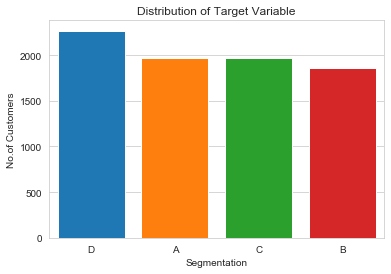

In [132]:
sns.countplot(x = 'Segmentation',data = Train, order = Train['Segmentation'].value_counts().index, saturation = 1).set_title('Distribution of Target Variable')
plt.ylabel("No.of Customers");

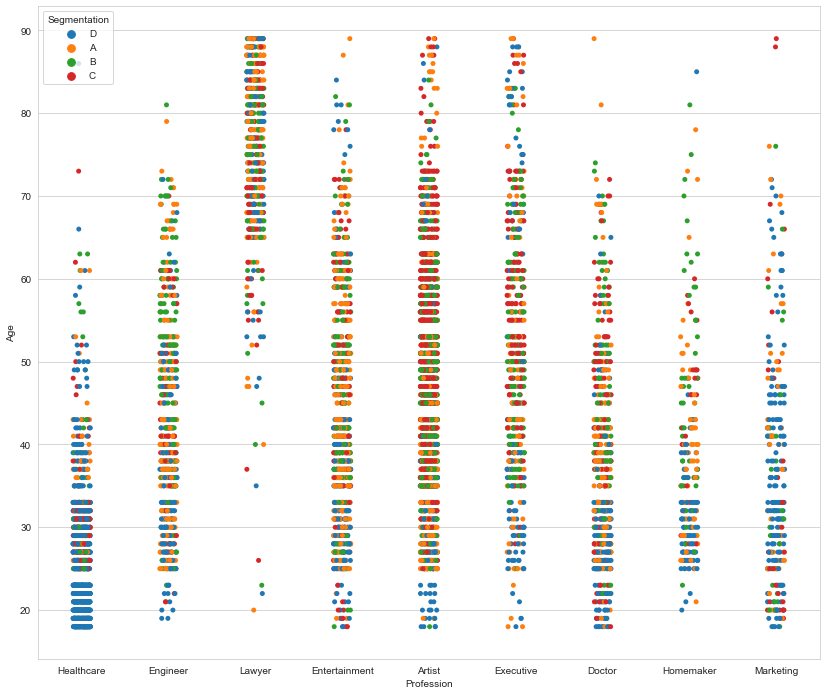

In [133]:
plt.figure(figsize=(14,12))
g = sns.stripplot(x = 'Profession',y = 'Age', hue='Segmentation',data = Train);

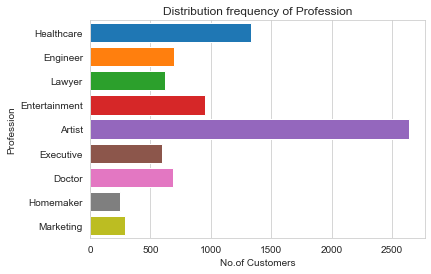

In [134]:
sns.countplot(y = 'Profession',data = Train, saturation = 1).set_title('Distribution frequency of Profession')
plt.xlabel("No.of Customers");

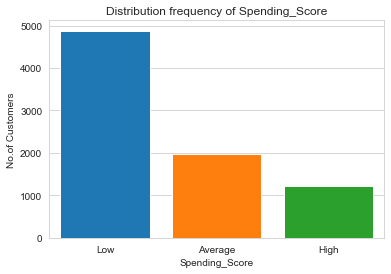

In [135]:
sns.countplot(x = 'Spending_Score',data = Train, saturation = 1).set_title('Distribution frequency of Spending_Score')
plt.ylabel("No.of Customers");

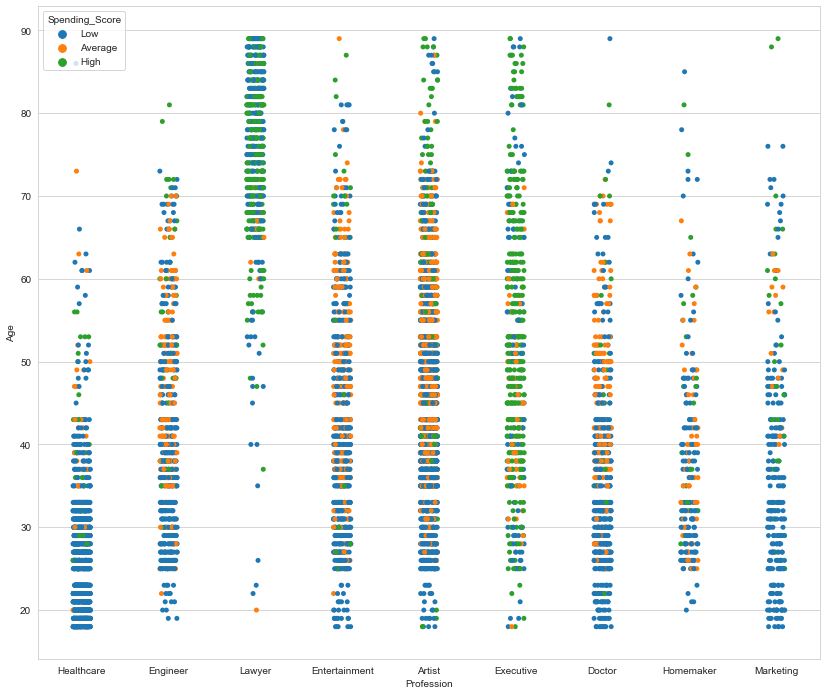

In [136]:
plt.figure(figsize=(14,12))
g = sns.stripplot(x = 'Profession',y = 'Age', hue='Spending_Score',data = Train);

**Lawyers (above 30 yrs) and Executives have high spending score. Likewise, few Artist above 70 yrs have similar spending score**

In [137]:
map_profession = {"Healthcare": 'HH&M', 'Marketing': 'HH&M', 'Homemaker': 'HH&M',
                  "Artist": 'Artist', 
                  "Lawyer": 'L&E', 'Executive' : 'L&E',
                  'Engineer' : 'E&D', 'Doctor' : 'E&D',
                  'Entertainment': 'Entertainment'} 

for dataset in Train:
    Train['Profession_map'] = Train['Profession'].map(map_profession)

In [138]:
map_profession = {"Healthcare": 'HH&M', 'Marketing': 'HH&M', 'Homemaker': 'HH&M',
                  "Artist": 'Artist', 
                  "Lawyer": 'L&E', 'Executive' : 'L&E',
                  'Engineer' : 'E&D', 'Doctor' : 'E&D',
                  'Entertainment': 'Entertainment'} 

for dataset in Test:
    Test['Profession_map'] = Test['Profession'].map(map_profession) 

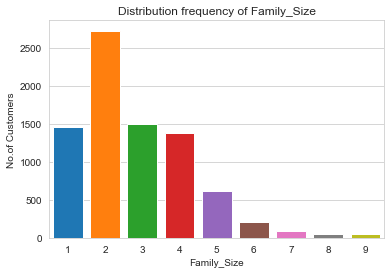

In [139]:
sns.countplot(x = 'Family_Size',data = Train, saturation = 1).set_title('Distribution frequency of Family_Size')
plt.ylabel("No.of Customers");

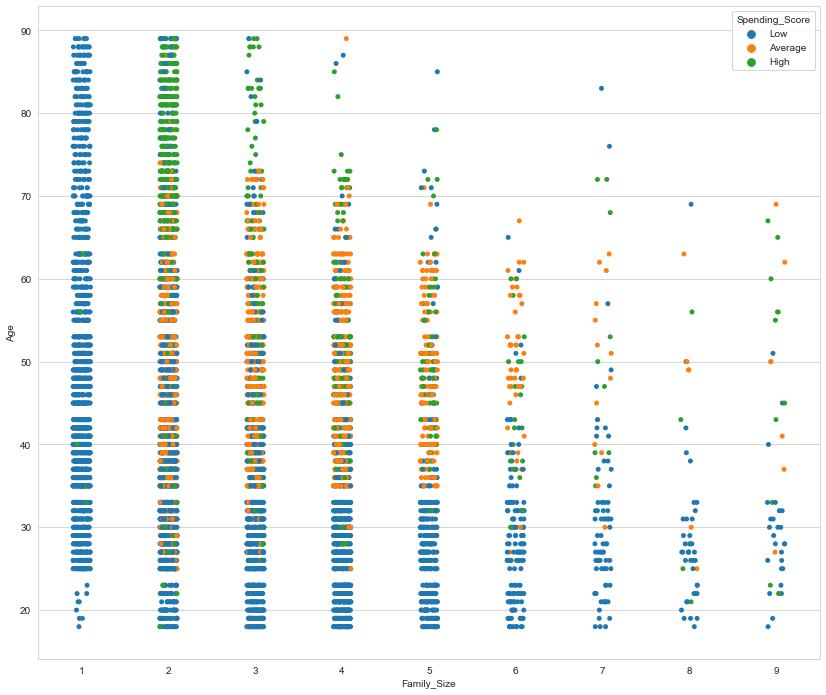

In [140]:
plt.figure(figsize=(14,12))
g = sns.stripplot(x = 'Family_Size',y = 'Age', hue='Spending_Score',data = Train);

- Most of the customers below 35yrs have low spending score.

- Irespective of the age individuals (family_size = 1) have low spending score as well.

- family_size 2 (above 50 yrs) have high spending score.

- family_size 3,4 & 5 shows similar trend in spending.

- family_size 6,7,8 & 9 shows similar trend in spending.


In [141]:
map_family = {1 : 1,
              2 : 2,
              3 : 3, 4 : 3, 5 : 3,
              6 : 4, 7 : 4, 8 : 4, 9 : 4}

for dataset in Train:
    Train['Family_map'] = Train['Family_Size'].map(map_family)  

In [142]:
map_family = {1 : 1,
              2 : 2,
              3 : 3, 4 : 3, 5 : 3,
              6 : 4, 7 : 4, 8 : 4, 9 : 4}

for dataset in Test:
    Test['Family_map'] = Test['Family_Size'].map(map_family) 

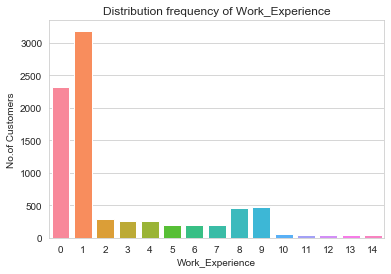

In [143]:
sns.countplot(x = 'Work_Experience',data = Train, saturation = 1).set_title('Distribution frequency of Work_Experience')
plt.ylabel("No.of Customers");

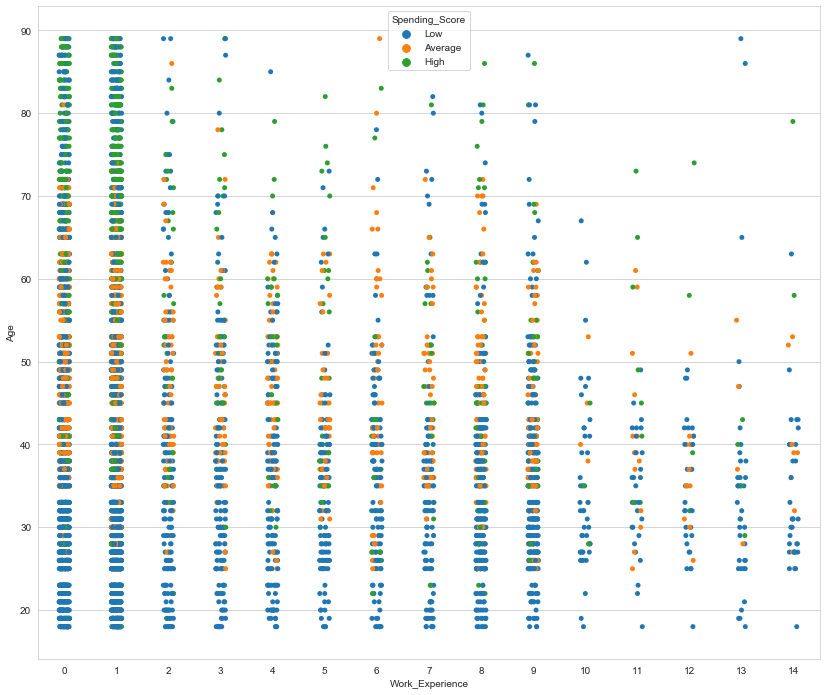

In [144]:
plt.figure(figsize=(14,12))
g = sns.stripplot(x = 'Work_Experience',y = 'Age', hue='Spending_Score',data = Train);

In [145]:
map_workexp = { 0 : '0-1', 1 : '0-1',
                2 : '2-7', 3 : '2-7', 4 : '2-7', 5 : '2-7', 6 : '2-7', 7 : '2-7',
                8 : '8-9', 9 : '8-9',
               10 : '10-14', 11 : '10-14', 12 : '10-14', 13 : '10-14', 14 : '10-14'}

for dataset in Train:
    Train['workexp_map'] = Train['Work_Experience'].map(map_workexp)  
    

In [146]:
map_workexp = { 0 : '0-1', 1 : '0-1',
                2 : '2-7', 3 : '2-7', 4 : '2-7', 5 : '2-7', 6 : '2-7', 7 : '2-7',
                8 : '8-9', 9 : '8-9',
               10 : '10-14', 11 : '10-14', 12 : '10-14', 13 : '10-14', 14 : '10-14'}

for dataset in Test:
    Test['workexp_map'] = Test['Work_Experience'].map(map_workexp)  
    

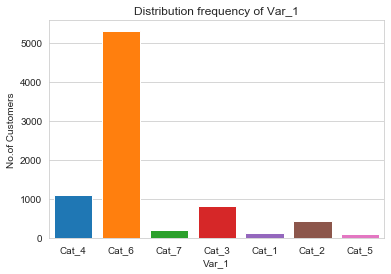

In [147]:
sns.countplot(x = 'Var_1',data = Train, saturation = 1).set_title('Distribution frequency of Var_1')
plt.ylabel("No.of Customers");

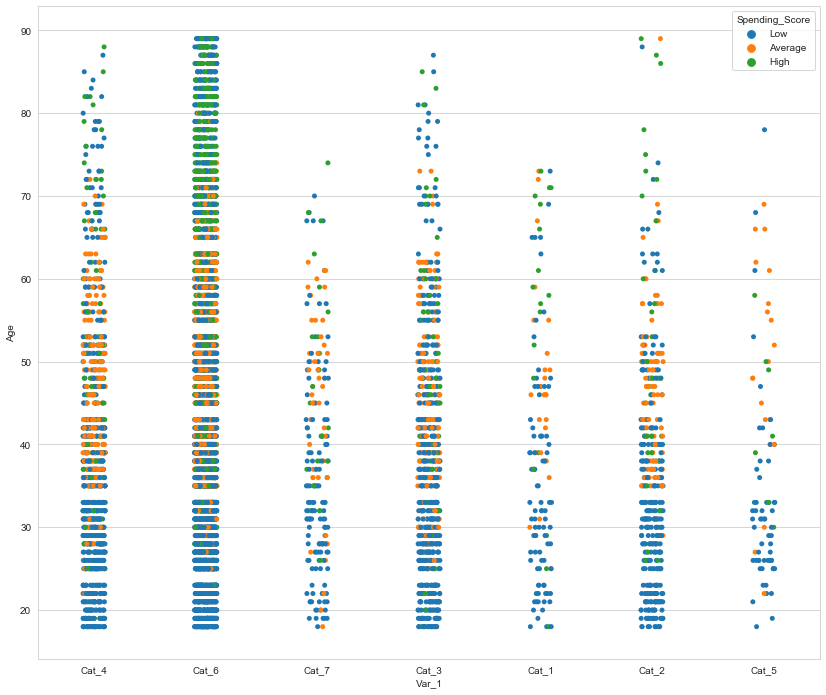

In [148]:
plt.figure(figsize=(14,12))
g = sns.stripplot(x = 'Var_1',y = 'Age', hue='Spending_Score',data = Train);

In [149]:
map_Var1 = {'Cat_6' : 'Cat_6'}

for dataset in Train:
    Train['Var1_map'] = Train['Var_1'].map(map_Var1) 
    

In [150]:
map_Var1 = {'Cat_6' : 'Cat_6'}

for dataset in Test:
    Test['Var1_map'] = Test['Var_1'].map(map_Var1) 

In [151]:
Train['Var1_map'] = Train['Var1_map'].replace(np.nan, 'Cat_12345')

Test['Var1_map'] = Test['Var1_map'].replace(np.nan, 'Cat_12345') 

In [152]:
age_bin = [0,35,50,70,90]
age_labels = ['Young','middle','old', 'very_old']
Train['age_group'] = pd.cut(Train['Age'],bins = age_bin,labels = age_labels)

In [153]:
age_bin = [0,35,50,70,90]
age_labels = ['Young','middle','old', 'very_old']
Test['age_group'] = pd.cut(Test['Age'], bins = age_bin, labels = age_labels)

In [154]:
Train.dtypes

ID                 int64   
Gender             object  
Ever_Married       object  
Age                int64   
Graduated          object  
Profession         object  
Work_Experience    category
Spending_Score     object  
Family_Size        category
Var_1              object  
Segmentation       object  
Profession_map     object  
Family_map         int64   
workexp_map        object  
Var1_map           object  
age_group          category
dtype: object

In [155]:
Test.dtypes

ID                 int64   
Gender             object  
Ever_Married       object  
Age                int64   
Graduated          object  
Profession         object  
Work_Experience    category
Spending_Score     object  
Family_Size        category
Var_1              object  
Profession_map     object  
Family_map         int64   
workexp_map        object  
Var1_map           object  
age_group          category
dtype: object

In [156]:
Train['Family_map'] = Train['Family_map'].astype('category')

Test['Family_map'] = Test['Family_map'].astype('category')

In [157]:
Train['workexp_map'] = Train['workexp_map'].astype('category')

Test['workexp_map'] = Test['workexp_map'].astype('category')

In [158]:
Train['Var1_map'] = Train['Var1_map'].astype('category')

Test['Var1_map'] = Test['Var1_map'].astype('category')

In [159]:
Train['Profession_map'] = Train['Profession_map'].astype('category')

Test['Profession_map'] = Test['Profession_map'].astype('category')

In [160]:
Train.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation', 'Profession_map', 'Family_map', 'workexp_map',
       'Var1_map', 'age_group'],
      dtype='object')

In [161]:
Train.set_index('ID', inplace = True)

In [162]:
Test.set_index('ID', inplace = True)

In [164]:
Train.drop(['Profession', 'Work_Experience', 'Family_Size', 'Var_1'], axis = 1, inplace = True)

In [166]:
Test.drop(['Profession', 'Work_Experience', 'Family_Size', 'Var_1'], axis = 1, inplace = True)

In [167]:
Test.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Spending_Score',
       'Profession_map', 'Family_map', 'workexp_map', 'Var1_map', 'age_group'],
      dtype='object')

In [168]:
cat_cols = ['Gender', 'Ever_Married', 'Graduated', 'Spending_Score',
            'Profession_map', 'Family_map', 'workexp_map', 'Var1_map', 'age_group']

### Train-Validation Split

In [169]:
from sklearn.model_selection import train_test_split

train, valid = train_test_split(Train, test_size = 0.3, random_state = 555)

In [170]:
print("Shape of training set:", train.shape)
print("Shape of validation set:", valid.shape)
print("Shape of test set:", Test.shape)

Shape of training set: (5647, 11)
Shape of validation set: (2421, 11)
Shape of test set: (2627, 10)


**Separating the dependent and independent variables**

In [171]:
x_train = train.drop('Segmentation', axis = 1)
y_train = train['Segmentation']

x_valid = valid.drop('Segmentation', axis = 1)
y_valid = valid['Segmentation']

In [172]:
x_train = pd.get_dummies(x_train, columns = cat_cols, drop_first = True)
x_valid = pd.get_dummies(x_valid, columns = cat_cols, drop_first = True) 
x_test =  pd.get_dummies(Test, columns = cat_cols, drop_first = True) 

In [173]:
print(x_train.shape)

print(x_valid.shape)

print(x_test.shape)

(5647, 20)
(2421, 20)
(2627, 20)


In [174]:
x_train.head(2)

,Age,Gender_Male,Ever_Married_Yes,Graduated_Yes,Spending_Score_High,Spending_Score_Low,Profession_map_E&D,Profession_map_Entertainment,Profession_map_HH&M,Profession_map_L&E,Family_map_2,Family_map_3,Family_map_4,workexp_map_10-14,workexp_map_2-7,workexp_map_8-9,Var1_map_Cat_6,age_group_middle,age_group_old,age_group_very_old
ID,,,,,,,,,,,,,,,,,,,,
462520,25,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
463701,52,1,1,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0


In [175]:
x_test.head(2)

,Age,Gender_Male,Ever_Married_Yes,Graduated_Yes,Spending_Score_High,Spending_Score_Low,Profession_map_E&D,Profession_map_Entertainment,Profession_map_HH&M,Profession_map_L&E,Family_map_2,Family_map_3,Family_map_4,workexp_map_10-14,workexp_map_2-7,workexp_map_8-9,Var1_map_Cat_6,age_group_middle,age_group_old,age_group_very_old
ID,,,,,,,,,,,,,,,,,,,,
458989,36,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0
458994,37,1,1,1,0,0,0,0,1,0,0,1,0,0,0,1,1,1,0,0


Feature Scaling

In [176]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_valid = sc.transform(x_valid) 

x_Test = sc.transform(x_test)  

In [177]:
x_train[1]

array([ 0.50502108,  0.9044855 ,  0.82714173,  0.76769858,  2.36905301,
       -1.2424547 , -0.45172024, -0.36347913,  1.82043405, -0.42443644,
       -0.70644949,  1.14190961, -0.23012048, -0.17724425, -0.4554096 ,
       -0.35372945,  0.73167294, -0.72029669,  1.90790424, -0.29955583])

### Model Building

In [178]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#### Logistic Regression

In [179]:
# we define 2 list that one of them save results(F1-Macro avg) of models other list save name of model

labelList = []
resultList = []

In [180]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state = 1)

LR.fit(x_train, y_train)

y_pred_LR_train = LR.predict(x_train)
y_pred_LR_valid = LR.predict(x_valid)
y_pred_LR_test = LR.predict(x_test) 

f1_lr_train = f1_score(y_train, y_pred_LR_train, average = 'macro')
f1_lr_valid = f1_score(y_valid, y_pred_LR_valid, average = 'macro')

print('Train F1 Macro')
print(f1_lr_train * 100)

print('======================')

print('Validation F1 Macro')
print(f1_lr_valid * 100)

# adding result and label to lists

labelList.append("LR")
resultList.append(f1_lr_valid)

Train F1 Macro
49.487927676165086
Validation F1 Macro
49.11508721764184


In [181]:
def LR_model_evaluation(y_train, y_pred_LR_train, y_valid, y_LR_KNN_valid) :
    
    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================''')
    print(classification_report(y_train, y_pred_LR_train))
    
    print('''
            =========================================
               CLASSIFICATION REPORT FOR VALIDATION DATA
            =========================================''')
    print(classification_report(y_valid, y_pred_LR_valid)) 

In [182]:
LR_model_evaluation(y_train, y_pred_LR_train, y_valid, y_pred_LR_valid)


               CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

           A       0.43      0.45      0.44      1372
           B       0.42      0.23      0.29      1304
           C       0.50      0.64      0.56      1386
           D       0.65      0.72      0.68      1585

    accuracy                           0.52      5647
   macro avg       0.50      0.51      0.49      5647
weighted avg       0.51      0.52      0.50      5647


               CLASSIFICATION REPORT FOR VALIDATION DATA
              precision    recall  f1-score   support

           A       0.42      0.43      0.43       600
           B       0.43      0.24      0.31       554
           C       0.50      0.62      0.56       584
           D       0.64      0.72      0.67       683

    accuracy                           0.51      2421
   macro avg       0.50      0.50      0.49      2421
weighted avg       0.50      0.51      0.50      2421



In [183]:
from sklearn.ensemble import RandomForestClassifier

In [184]:
RF = RandomForestClassifier(random_state = 1)

RF.fit(x_train, y_train)

y_pred_RF_train = RF.predict(x_train)
y_pred_RF_valid = RF.predict(x_valid)
y_pred_RF_test = RF.predict(x_test)

f1_RF_train = f1_score(y_train, y_pred_RF_train, average = 'macro')
f1_RF_valid = f1_score(y_valid, y_pred_RF_valid, average = 'macro')

print('Train F1 Macro')
print(f1_RF_train * 100)

print('======================')

print('Validation F1 Macro')
print(f1_RF_valid * 100)

# adding result and label to lists

labelList.append("RF")
resultList.append(f1_RF_valid)

Train F1 Macro
87.9657870679162
Validation F1 Macro
45.525944160584366


In [185]:
def RF_model_evaluation(y_train, y_pred_RF_train, y_valid, y_pred_RF_valid) :
    
    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================''')
    print(classification_report(y_train, y_pred_RF_train))
    
    print('''
            =========================================
               CLASSIFICATION REPORT FOR VALIDATION DATA
            =========================================''')
    print(classification_report(y_valid, y_pred_RF_valid)) 

In [186]:
RF_model_evaluation(y_train, y_pred_RF_train, y_valid, y_pred_RF_valid)


               CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

           A       0.90      0.87      0.88      1372
           B       0.87      0.82      0.85      1304
           C       0.84      0.88      0.86      1386
           D       0.91      0.94      0.93      1585

    accuracy                           0.88      5647
   macro avg       0.88      0.88      0.88      5647
weighted avg       0.88      0.88      0.88      5647


               CLASSIFICATION REPORT FOR VALIDATION DATA
              precision    recall  f1-score   support

           A       0.40      0.38      0.39       600
           B       0.34      0.32      0.33       554
           C       0.50      0.52      0.51       584
           D       0.58      0.61      0.59       683

    accuracy                           0.46      2421
   macro avg       0.45      0.46      0.46      2421
weighted avg       0.46      0.46      0.46      2421



#### Grid Search CV - Random Forest

In [187]:
RF_GS = RandomForestClassifier()

params_grid_RF = {'criterion':['gini','entropy'],
                  'max_depth':[9,10,11,12,13,14],
                  'min_samples_split':[3,4,5,6],
                  'min_samples_leaf':[1,2,3,4],
                  'class_weight':['balanced','balanced_subsample',None]}

grid_search_RF=GridSearchCV(RF_GS,params_grid_RF,
                            n_jobs=-1,scoring='accuracy',cv=5)

grid_search_RF.fit(x_train,y_train)

grid_search_RF.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 6}

In [205]:
RF_tuned = RandomForestClassifier(class_weight= 'balanced', criterion='gini',max_depth=8,
                                  min_samples_leaf=1,min_samples_split=6,
                                  n_estimators=200, random_state = 12345)
RF_tuned.fit(x_train,y_train)
y_pred_RF_tuned_tr = RF_tuned.predict(x_train)
y_pred_RF_tuned_val = RF_tuned.predict(x_valid)

f1_rf_tuned_tr = f1_score(y_train,y_pred_RF_tuned_tr,average = 'macro')
f1_rf_tuned_val = f1_score(y_valid,y_pred_RF_tuned_val,average = 'macro')

print('Train F1 Macro')
print(f1_rf_tuned_tr*100)

print('Validation F1 Macro')
print(f1_rf_tuned_val*100)

Train F1 Macro
58.58254598289327
Validation F1 Macro
50.941507787793775


In [206]:
def RF_tuned_model_evaluation(y_train, y_pred_RF_tuned_tr, y_valid, y_pred_RF_tuned_val) :
    
    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================''')
    print(classification_report(y_train, y_pred_RF_tuned_tr))
    
    print('''
            =========================================
               CLASSIFICATION REPORT FOR VALIDATION DATA
            =========================================''')
    print(classification_report(y_valid, y_pred_RF_tuned_val)) 

In [207]:
RF_tuned_model_evaluation(y_train, y_pred_RF_tuned_tr, y_valid, y_pred_RF_tuned_val)


               CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

           A       0.53      0.60      0.56      1372
           B       0.52      0.41      0.46      1304
           C       0.60      0.60      0.60      1386
           D       0.69      0.75      0.72      1585

    accuracy                           0.60      5647
   macro avg       0.59      0.59      0.59      5647
weighted avg       0.59      0.60      0.59      5647


               CLASSIFICATION REPORT FOR VALIDATION DATA
              precision    recall  f1-score   support

           A       0.44      0.47      0.46       600
           B       0.40      0.31      0.35       554
           C       0.58      0.58      0.58       584
           D       0.62      0.69      0.65       683

    accuracy                           0.52      2421
   macro avg       0.51      0.51      0.51      2421
weighted avg       0.51      0.52      0.52      2421



In [208]:
RF_prediction = y_pred_RF_test

submission = pd.DataFrame({"ID": submission["ID"],
                           "Segmentation": RF_prediction})

submission.to_csv('sub_RF.csv',index=False)

In [209]:
import eli5
from eli5.sklearn import PermutationImportance

In [211]:
PI_RF = PermutationImportance(RF,random_state=44).fit(x_valid,y_valid)
eli5.show_weights(PI_RF)

Weight,Feature
0.0448 ± 0.0062,x8
0.0387 ± 0.0041,x5
0.0374 ± 0.0092,x0
0.0228 ± 0.0126,x3
0.0135 ± 0.0073,x2
0.0131 ± 0.0071,x7
0.0107 ± 0.0059,x16
0.0097 ± 0.0073,x6
0.0069 ± 0.0054,x15
0.0059 ± 0.0069,x10
